<a href="https://colab.research.google.com/github/nirajgole/colab_research/blob/main/Regression/dphi_multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Multiple Linear Regression With ScikitLearn

In [36]:
# libraries for numerical
import numpy as np
import pandas as pd

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for machine learning 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [37]:
# load kc housing data
data_url='https://raw.githubusercontent.com/tanlitung/Datasets/master/kc_house_data.csv'
df = pd.read_csv(data_url)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [39]:
# omit id and date columns
df.drop('id',axis=1,inplace=True)
df.drop('date',axis=1,inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [41]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396058,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.089843,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Normalizing Data for Comparison

In [42]:
from sklearn import preprocessing

# Scale and plot the features against price (target) using the min-max scaler (Normalization)
min_max_scaler=preprocessing.MinMaxScaler()
col_name=df.drop('price',axis=1).columns[:]
x=df.loc[:,col_name]
y=df['price']

#normalizing x
x=pd.DataFrame(data=min_max_scaler.fit_transform(x),columns=col_name)

# Examine the normalized data
print(df.head())
x.head()

      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871


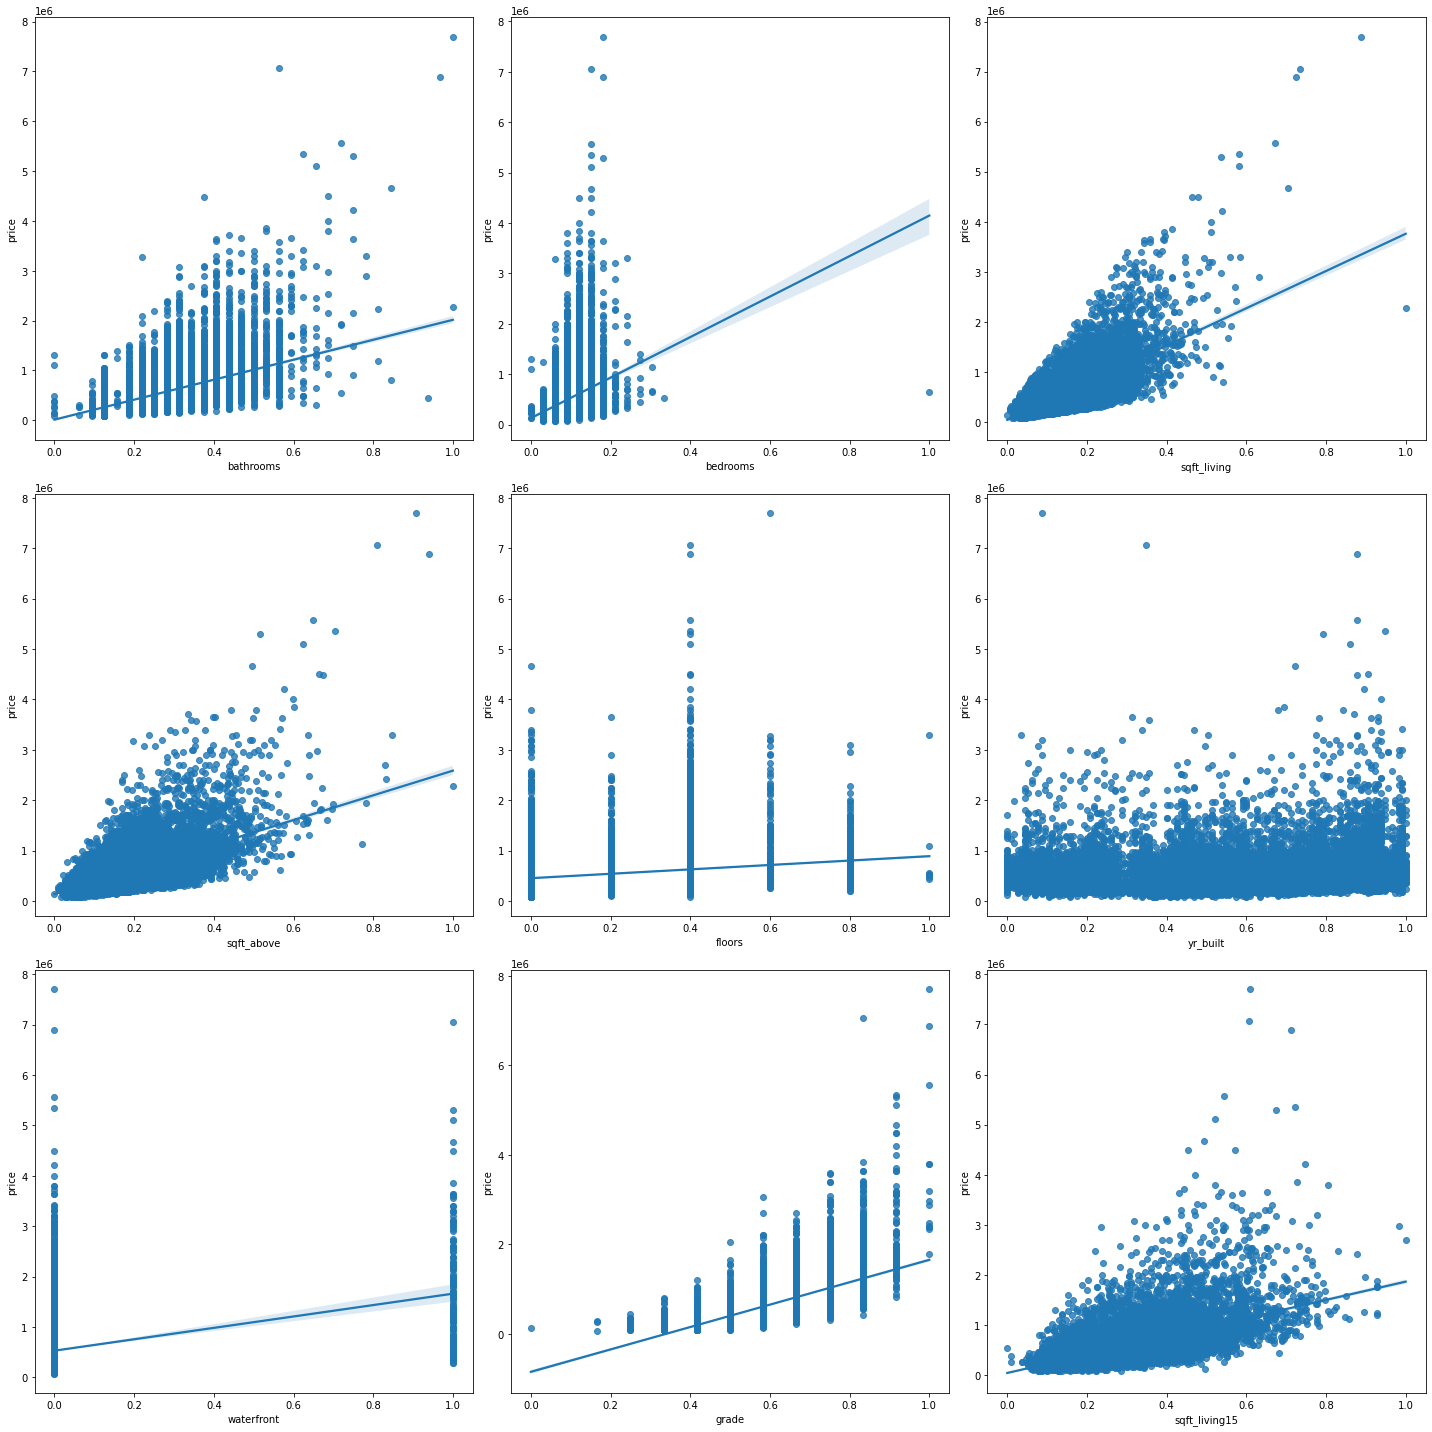

In [43]:
#Examine relationship between target ('price') and each feature using sns.regplot
fig,axs=plt.subplots(ncols=3,nrows=3,figsize=(20,20))
sns.regplot(y = y, x = x['bathrooms'], ax = axs[0, 0])
sns.regplot(y=y,x=x['bedrooms'],ax=axs[0,1])
sns.regplot(y = df['price'], x = x['sqft_living'], ax = axs[0, 2])
sns.regplot(y = df['price'], x = x['sqft_above'], ax = axs[1, 0])
sns.regplot(y = df['price'], x = x['floors'], ax = axs[1, 1])
sns.regplot(y = df['price'], x = x['yr_built'], ax = axs[1, 2])
sns.regplot(y = df['price'], x = x['waterfront'], ax = axs[2, 0])
sns.regplot(y = df['price'], x = x['grade'], ax = axs[2, 1])
sns.regplot(y = df['price'], x = x['sqft_living15'], ax = axs[2, 2])
plt.tight_layout()

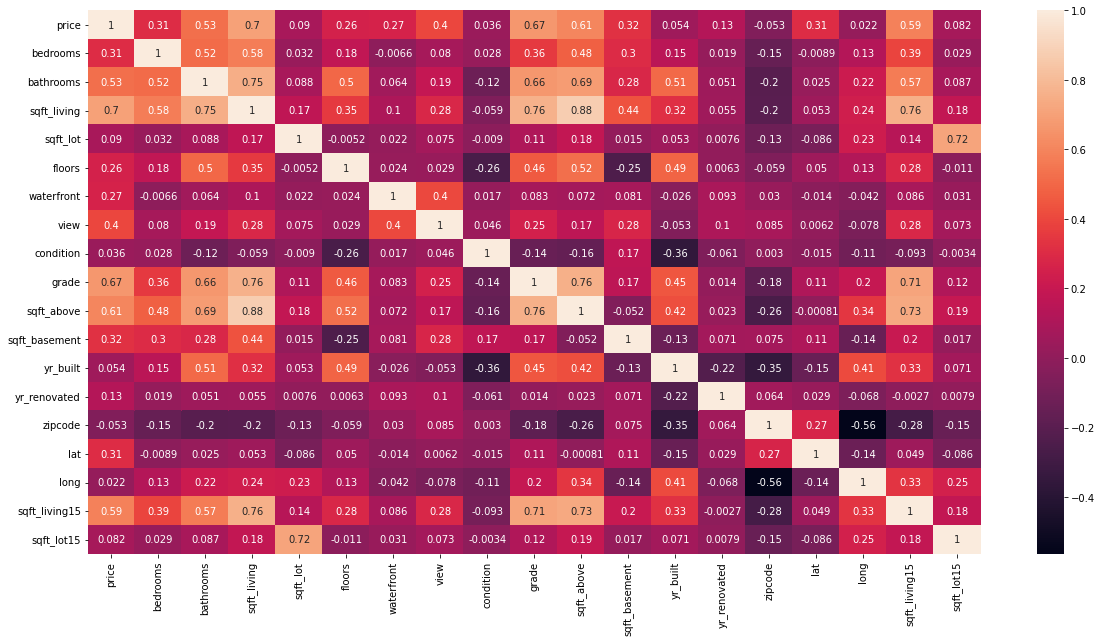

In [44]:
# heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Split the data and Train the model

In [45]:
features=df.drop('price',axis=1)
target=df['price']
train_features, test_features, train_target, test_target = train_test_split(features,target,test_size=0.4,random_state=5)
print('Train faetures: ',train_features.shape)
print('Test features: ', test_features.shape)
print('Train target: ',train_target.shape)
print('Test target: ', test_target.shape)

Train faetures:  (12967, 18)
Test features:  (8646, 18)
Train target:  (12967,)
Test target:  (8646,)


# Model Building

In [46]:
model = LinearRegression(normalize=True)
model.fit(train_features,train_target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

# Interpret the Model

In [47]:
print('Model Intercept: ',model.intercept_,'\n')
# print('Model Coefficient: ',model.coef_,'\n')

for i in range(len(features.columns)):
  print(features.columns[i].ljust(15),' : ',model.coef_[i])

Model Intercept:  2152398.981051906 

bedrooms         :  -35241.97758563284
bathrooms        :  40808.77767631755
sqft_living      :  -2566.868894438517
sqft_lot         :  0.17126905677763166
floors           :  1768.7830106064714
waterfront       :  577520.9729070798
view             :  52799.88560215688
condition        :  27092.396906137346
grade            :  96852.81612827
sqft_above       :  2750.9396681599037
sqft_basement    :  2715.7047488442963
yr_built         :  -2555.7122735892904
yr_renovated     :  22.509848091589696
zipcode          :  -537.5172264833905
lat              :  609176.4664995009
long             :  -212294.1159890641
sqft_living15    :  15.833975815322022
sqft_lot15       :  -0.394942498984891


In [48]:
# Model evaluation fro training set
train_target_pred=model.predict(train_features)
rmse=np.sqrt(mean_squared_error(train_target,train_target_pred))
r2=r2_score(train_target,train_target_pred)

#Examine the first 10 predicted output from model
output=pd.DataFrame(train_target[0:10])
output['Predicted']=train_target_pred[0:10]
output['Diff']=output['Predicted']-output['price']
print(output,'\n')

print('Model training performance')
print('--------------------------')
print('RMSE: ',rmse)
print('R2_SCORE: ',r2,'\n')

           price     Predicted           Diff
17060   700000.0  1.029100e+06  329099.817957
15497   601002.0  5.514206e+05  -49581.397924
15619   329950.0  3.217751e+05   -8174.887307
16022   300000.0  4.298734e+05  129873.392891
7323    435000.0  3.612705e+05  -73729.546657
4733    925000.0  1.125585e+06  200584.753535
15899   300000.0  3.265432e+05   26543.227125
19621   235000.0  1.285087e+05 -106491.337635
20813  1330000.0  1.139925e+06 -190074.868853
14193   950000.0  6.828757e+05 -267124.277815 

Model training performance
--------------------------
RMSE:  203579.26010969587
R2_SCORE:  0.6945581640353217 



In [49]:
# Model evaluation for testing set
test_target_pred=model.predict(test_features)
test_ip=(test_target,test_target_pred)
test_rmse=np.sqrt(mean_squared_error(*test_ip))
test_r2=r2_score(*test_ip)

test_output=pd.DataFrame(test_target[:10])
test_output['Pred']=test_target_pred[:10]
test_output['Diff']=test_output['Pred']-test_output['price']
print(test_output,'\n')

print('Model testing performace ')
print('------------------------------')
print('RMSE: ',test_rmse)
print('R2_SCORE',test_r2,'\n')

          price          Pred           Diff
17485  365000.0  4.259938e+05   60993.800966
15164  225000.0  9.851075e+04 -126489.249826
18449  384950.0  4.821515e+05   97201.508047
6828   657500.0  5.837561e+05  -73743.908849
18281  959000.0  1.194966e+06  235965.741163
14625  855000.0  8.771881e+05   22188.074295
14864  575000.0  6.373582e+05   62358.243703
17257  856500.0  9.824372e+05  125937.197257
11817  250000.0  3.375013e+05   87501.308991
15262  360000.0  5.999272e+05  239927.175696 

Model testing performace 
------------------------------
RMSE:  198024.28801096207
R2_SCORE 0.7070015974540831 

          price          Pred           Diff
17485  365000.0  4.259938e+05   60993.800966
15164  225000.0  9.851075e+04 -126489.249826
18449  384950.0  4.821515e+05   97201.508047
6828   657500.0  5.837561e+05  -73743.908849
18281  959000.0  1.194966e+06  235965.741163
14625  855000.0  8.771881e+05   22188.074295
14864  575000.0  6.373582e+05   62358.243703
17257  856500.0  9.824372e+05 